In [4]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
from mpl_toolkits.axes_grid1 import make_axes_locatable
import itertools
import matplotlib as mpl
import sys



from nbodykit.lab import *

In [5]:
"""Create k^2 in box (nc x nc x nc)"""
def k_box(nc,L):
    kfac = 2.*np.pi/L
    k= np.fft.fftfreq(nc,d=1./nc/kfac) #d controls spacing
    a = np.transpose(np.indices((nc,nc,nc)).T, (2, 1, 0, 3)) #1 grid cell 3 coordinates
    k2=(k[a]**2).sum(axis=-1) # each grid cell is sum of squares of coordinates
    return (np.sqrt(k2))

In [6]:
def measure_pk(s1, s2, k, kbin):
    fs1 = np.fft.fftn(s1)
    fs2 = np.fft.fftn(s2)
    power = np.zeros(len(kbin)-1)
    center_k = (kbin[:-1] + kbin[1:]) / 2
    #divide k array into kbin
    for i in range(len(kbin[:-1])):
        xind,yind,zind = np.where((k>=kbin[i])*(k<kbin[i+1])) # 3D index of all k values at bin[i]
        power[i] = (((fs1[xind,yind,zind].real*fs2[xind,yind,zind].real)+(fs1[xind,yind,zind].imag*fs2[xind,yind,zind].imag))).mean()#*(L**3/nc**6) 
    return (center_k,power)

In [38]:
def measure_autopk(array,L):
    mesh = ArrayMesh(array,BoxSize=L)
    r = FFTPower(mesh, mode='1d')
    return r.power

In [39]:
nc_birth = 256
L_birth = 480.
Nb = 100
k_birth = k_box(nc_birth,L_birth)
kmin_birth = 2.*np.pi/L_birth
kmax_birth = k_birth.max()
kbin_birth = np.linspace(kmin_birth,kmax_birth,Nb) #kmin = 2*pi/L, kmax from k^2 
file_in = '/gpfs02/work/metin/birth/multi_2/dmlcZ_2300.dat'
dm_birth = np.fromfile(file_in,dtype=np.float32).reshape((nc_birth,nc_birth,nc_birth))

In [40]:
%time k_bin_birth, power_birth = measure_pk(dm_birth,dm_birth,k_birth,kbin_birth)

CPU times: user 12.1 s, sys: 4.24 s, total: 16.3 s
Wall time: 17 s


In [41]:
%time Pk_birth = measure_autopk(dm_birth,L_birth)



CPU times: user 1.72 s, sys: 75 ms, total: 1.79 s
Wall time: 1.79 s


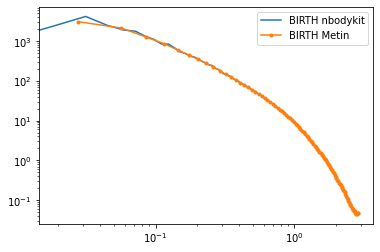

In [42]:
plt.loglog(Pk_birth['k'], Pk_birth['power'].real,label="BIRTH nbodykit")
plt.loglog(k_bin_birth,power_birth*L_birth**3/nc_birth**6,marker='.',label="BIRTH Metin")
plt.legend()
plt.show()